In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [4]:
# Use pandas to get some insights into the data
data = pd.read_csv('house_rental_data.csv')
data.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [5]:
data.describe()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,325.159690,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,187.312152,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,1.000000,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,164.000000,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,326.000000,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,487.000000,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,648.000000,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [7]:
data.isnull().sum()

Unnamed: 0     0
Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [8]:
correlation_matrix = data.corr()
print(correlation_matrix)

             Unnamed: 0      Sqft     Floor  TotalFloor   Bedroom  \
Unnamed: 0     1.000000 -0.065182 -0.021299   -0.039687 -0.008638   
Sqft          -0.065182  1.000000  0.143249    0.304515  0.615608   
Floor         -0.021299  0.143249  1.000000    0.564221  0.023986   
TotalFloor    -0.039687  0.304515  0.564221    1.000000  0.067298   
Bedroom       -0.008638  0.615608  0.023986    0.067298  1.000000   
Living.Room   -0.027035  0.455940 -0.023563    0.029373  0.526532   
Bathroom      -0.007877  0.728869  0.099772    0.146132  0.643083   
Price         -0.077512  0.825514  0.244553    0.333631  0.467059   

             Living.Room  Bathroom     Price  
Unnamed: 0     -0.027035 -0.007877 -0.077512  
Sqft            0.455940  0.728869  0.825514  
Floor          -0.023563  0.099772  0.244553  
TotalFloor      0.029373  0.146132  0.333631  
Bedroom         0.526532  0.643083  0.467059  
Living.Room     1.000000  0.546826  0.328788  
Bathroom        0.546826  1.000000  0.605542  
Pr

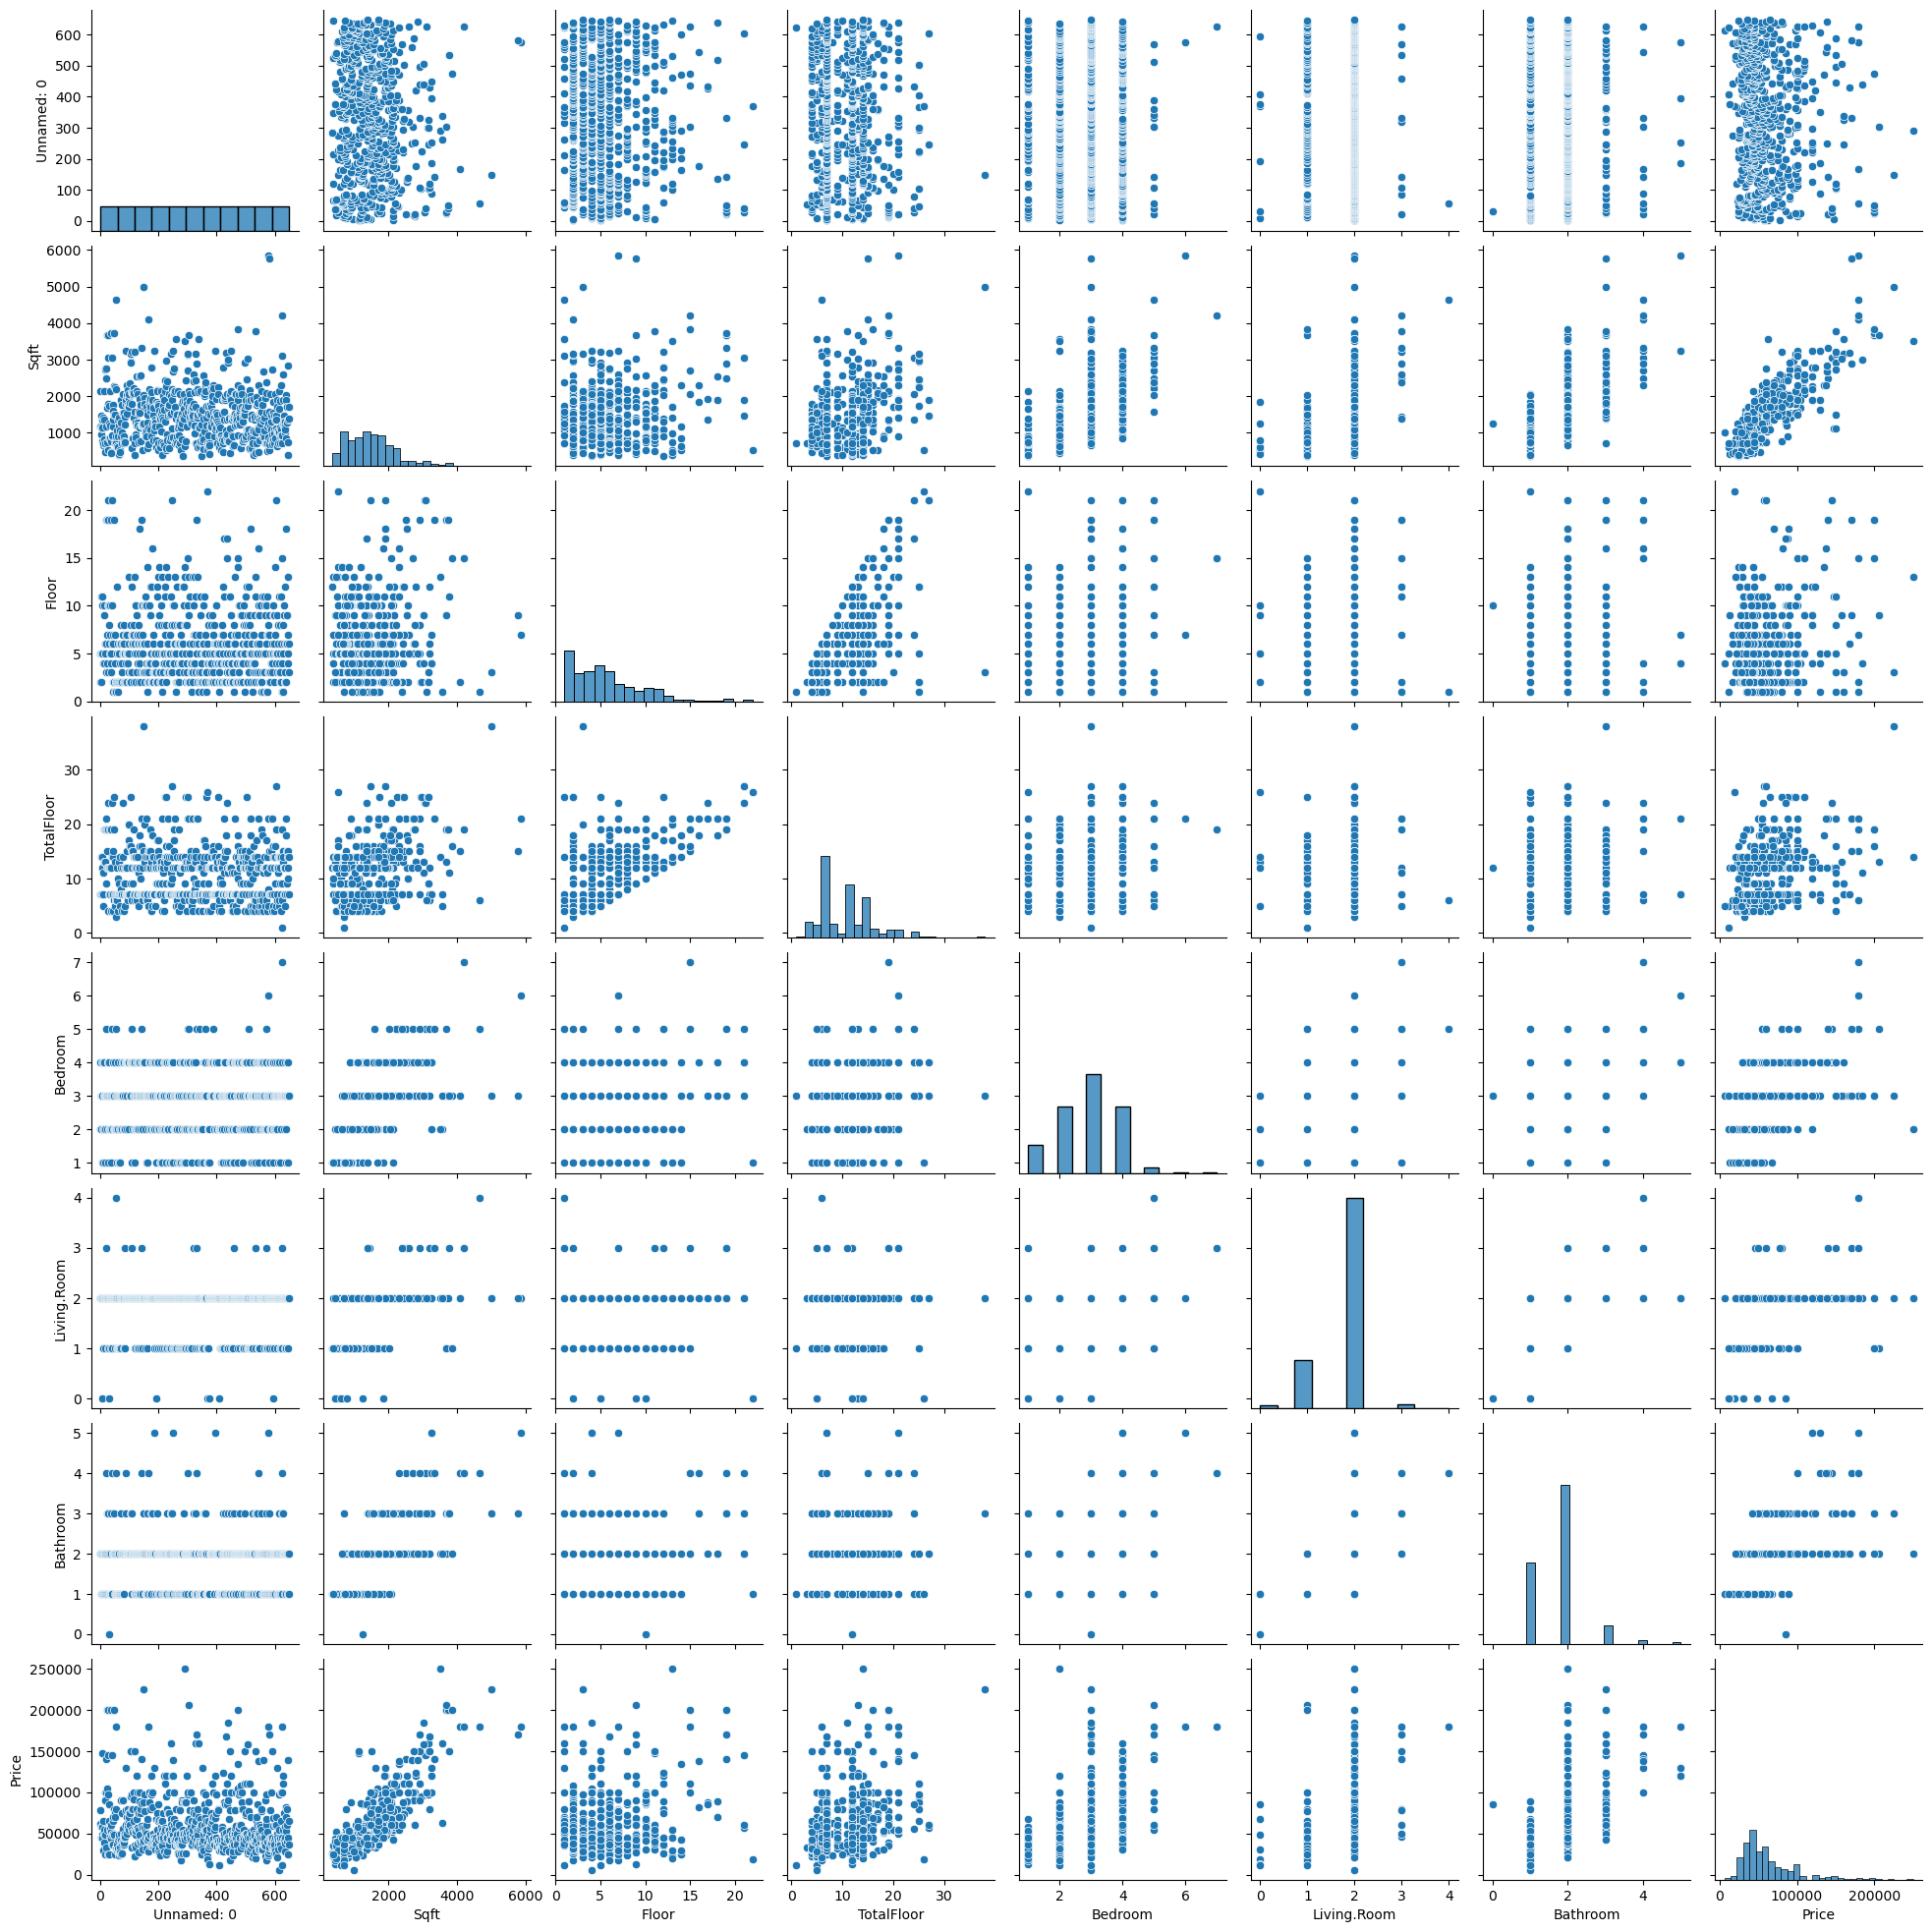

In [12]:
# Show some interesting visualization of the data
sns.pairplot(data)
plt.show()

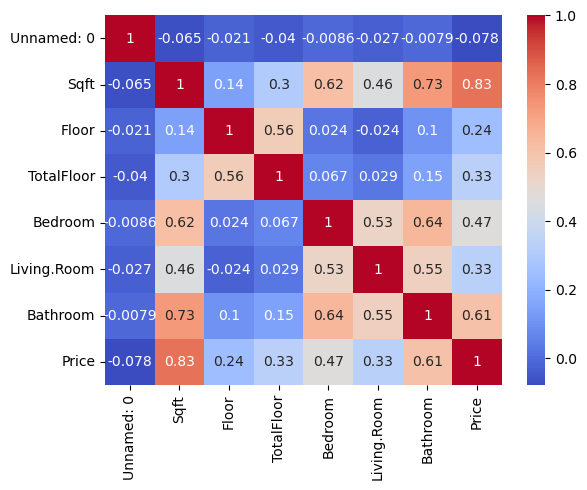

In [13]:
# Heatmap for correlation visualization
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [15]:
# Manage data for training & testing
# Features and target variable
X = data.drop(['Unnamed: 0', 'Price'], axis=1)
y = data['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X_train

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom
515,1487.244,6,7,3,1,2
29,853.920,6,7,2,1,1
274,1138.560,4,5,3,2,2
576,693.810,2,7,1,1,1
434,2910.444,4,7,3,2,3
...,...,...,...,...,...,...
71,1284.438,6,12,3,2,2
106,3202.200,12,12,5,3,3
270,1366.272,4,11,4,2,2
435,3010.068,4,11,3,2,2


In [17]:
 X_test

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom
632,1099.422,2,7,4,2,2
592,1102.980,2,4,2,2,2
599,1458.780,21,27,3,2,2
291,761.412,8,13,1,1,1
72,1892.856,2,7,4,2,3
...,...,...,...,...,...,...
513,843.246,2,18,1,1,1
631,996.240,3,5,3,1,1
215,1743.420,3,12,3,2,2
608,711.600,8,12,1,2,1


In [18]:
 y_train

515     36000
29      24028
274     26000
576     33000
434     90000
        ...  
71      41000
106     80000
270     49999
435    185000
102     95000
Name: Price, Length: 516, dtype: int64

In [19]:
y_test

632    57777
592    31000
599    60000
291    26000
72     90000
       ...  
513    51500
631    28000
215    45000
608    30000
135    48000
Name: Price, Length: 129, dtype: int64

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[-0.06513622, -0.01427756, -0.77301614,  0.15670897, -1.86211965,
         0.26475535],
       [-0.90081595, -0.01427756, -0.77301614, -0.81752993, -1.86211965,
        -1.23649477],
       [-0.52522956, -0.5223616 , -1.16407137,  0.15670897,  0.39871268,
         0.26475535],
       ...,
       [-0.22476044, -0.5223616 ,  0.00909431,  1.13094786,  0.39871268,
         0.26475535],
       [ 1.94425102, -0.5223616 ,  0.00909431,  0.15670897,  0.39871268,
         0.26475535],
       [ 1.85035442, -1.03044565,  2.74648088,  1.13094786,  0.39871268,
         0.26475535]])

In [23]:
X_test_scaled

array([[-0.57687269, -1.03044565, -0.77301614,  1.13094786,  0.39871268,
         0.26475535],
       [-0.57217786, -1.03044565, -1.35959898, -0.81752993,  0.39871268,
         0.26475535],
       [-0.10269486,  3.7963528 ,  3.13753611,  0.15670897,  0.39871268,
         0.26475535],
       [-1.02288153,  0.49380649,  0.40014953, -1.79176882, -1.86211965,
        -1.23649477],
       [ 0.4700744 , -1.03044565, -0.77301614,  1.13094786,  0.39871268,
         1.76600548],
       [ 0.22594324, -0.77640363,  0.59567715,  0.15670897,  0.39871268,
         0.26475535],
       [ 0.69542624, -0.26831958, -0.38196092,  1.13094786,  0.39871268,
         0.26475535],
       [ 0.49354855, -0.01427756, -0.77301614,  1.13094786,  0.39871268,
         0.26475535],
       [ 0.60152964, -0.26831958,  0.20462192,  0.15670897,  0.39871268,
         0.26475535],
       [-0.82100384, -1.03044565, -1.35959898, -0.81752993,  0.39871268,
        -1.23649477],
       [-0.45480711, -0.77640363, -0.77301614,  0.

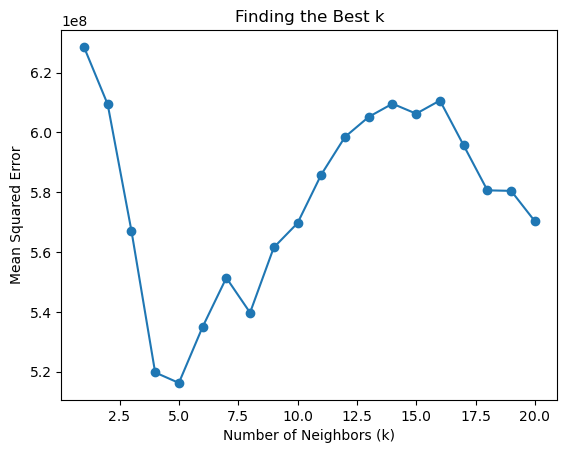

In [28]:
# Finding a better value of k
# Find the optimal value of k
mse_values = []

for k in range(1, 21):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Plot the Mean Squared Error for different values of k
plt.plot(range(1, 21), mse_values, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error')
plt.title('Finding the Best k')
plt.show()
